Generamos datos artificiales:

X:
[[-2.35572313  1.93221634]
 [-2.44896628  1.62828913]
 [-1.25934867  0.20734201]
 ...
 [-1.48137621  2.92599595]
 [ 2.24424702  0.96479988]
 [-2.07136364  2.93438995]]


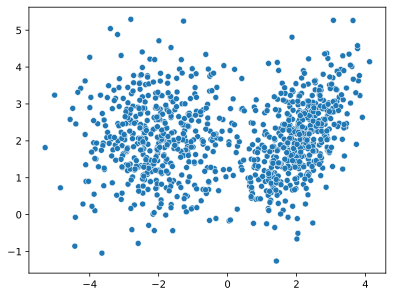

In [1]:
import numpy as np
from sklearn.datasets import make_classification
import seaborn as sns

%config InlineBackend.figure_format = "svg"

X, _ = make_classification(
    n_samples            = 1000,
    n_features           = 2,
    n_redundant          = 0,
    class_sep            = 2,
    n_clusters_per_class = 1,
    random_state         = 13
)

print("X:")
print(X)
sns.scatterplot(x=X[:, 0], y=X[:, 1]);

In [2]:
import pandas as pd
import numpy as np

Transformamos X a un dataframe:

In [3]:
datos = pd.DataFrame(data=X, columns=["Variable_1", "Variable_2"])
print(datos)

     Variable_1  Variable_2
0     -2.355723    1.932216
1     -2.448966    1.628289
2     -1.259349    0.207342
3      1.815272    0.794904
4      2.430197    2.342170
..          ...         ...
995   -1.773543    1.179728
996   -2.035966    2.384239
997   -1.481376    2.925996
998    2.244247    0.964800
999   -2.071364    2.934390

[1000 rows x 2 columns]


Aplicamos K-Means de la librería sklearn.cluster:

c:\Users\ch_us\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


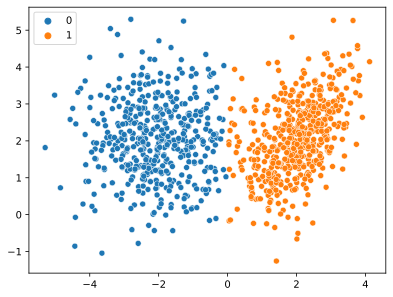

In [4]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=2, random_state=2022)
kmeans_model.fit(X)
y_label = kmeans_model.labels_

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_label);

Aplicamos el método del Elbow para determinar el número óptimo de clústers:

In [ ]:
pip install yellowbrick

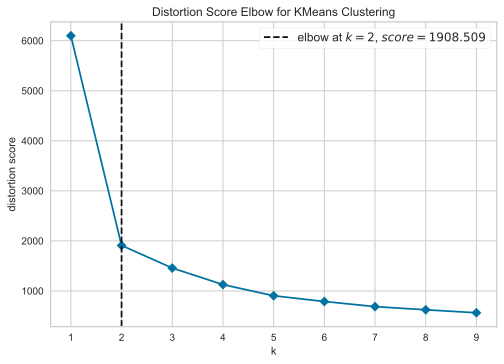

In [6]:
import warnings
warnings.filterwarnings("ignore")

from yellowbrick.cluster import KElbowVisualizer
kmeans_model2 = KElbowVisualizer(
    estimator = KMeans(random_state=2022),
    k         = (1, 10),
    timings   = False
)
kmeans_model2.fit(X)

kmeans_model2.show();

Confirmamos el óptimo de clústers; 2

Obtenemos las etiquetas de los clústers en la base:

In [7]:
labels = kmeans_model.labels_
print("Primeras 5 etiquetas:", labels[:5])

Primeras 5 etiquetas: [0 0 0 1 1]


Llevamos las etiquetas a un dataframe:

In [8]:
cluster = pd.DataFrame({"Cluster": labels})
print(cluster)

     Cluster
0          0
1          0
2          0
3          1
4          1
..       ...
995        0
996        0
997        0
998        1
999        0

[1000 rows x 1 columns]


Unir dataframe inicial con las etiquetas de los clústers:

In [9]:
union = pd.concat([datos, cluster], axis=1)
print(union[:5])

   Variable_1  Variable_2  Cluster
0   -2.355723    1.932216        0
1   -2.448966    1.628289        0
2   -1.259349    0.207342        0
3    1.815272    0.794904        1
4    2.430197    2.342170        1


Llevamos el dataframe final a un archivo CSV:

In [10]:
union.to_csv('union.csv')